# Homework 1: Preprocessing and Text Classification

Student Name: Jun Luo

Student ID: 792597

Python version used: Python2.7

## General info

<b>Due date</b>: 11pm, Sunday March 18th

<b>Submission method</b>: see LMS

<b>Submission materials</b>: completed copy of this iPython notebook

<b>Late submissions</b>: -20% per day

<b>Marks</b>: 5% of mark for class

<b>Overview</b>: In this homework, you'll be using a corpus of tweets to do tokenisation of hashtags and build polarity classifers using bag of word (BOW) features.

<b>Materials</b>: See the main class LMS page for information on the basic setup required for this class, including an iPython notebook viewer and the python packages NLTK, Numpy, Scipy, Matplotlib, Scikit-Learn, and Gensim. In particular, if you are not using a lab computer which already has it installed, we recommend installing all the data for NLTK, since you will need various parts of it to complete this assignment. You can also use any Python built-in packages, but do not use any other 3rd party packages (the packages listed above are all fine to use); if your iPython notebook doesn't run on the marker's machine, you will lose marks.  

<b>Evaluation</b>: Your iPython notebook should run end-to-end without any errors in a few minutes, and you must follow all instructions provided below, including specific implementation requirements and instructions for what needs to be printed (please avoid printing output we don't ask for). The amount each section is worth is given in parenthesis after the instructions. You will be marked not only on the correctness of your methods, but also the quality and efficency of your code: in particular, you should be careful to use Python built-in functions and operators when appropriate and pick descriptive variable names that adhere to <a href="https://www.python.org/dev/peps/pep-0008/">Python style requirements</a>. If you think it might be unclear what you are doing, you should comment your code to help the marker make sense of it.

<b>Extra credit</b>: Each homework has a task which is optional with respect to getting full marks on the assignment, but that can be used to offset any points lost on this or any other homework assignment (but not the final project or the exam). We recommend you skip over this step on your first pass, and come back if you have time: the amount of effort required to receive full marks (1 point) on an extra credit question will be substantially more than earning the same amount of credit on other parts of the homework.

<b>Updates</b>: Any major changes to the assignment will be announced via LMS. Minor changes and clarifications will be announced in the forum on LMS, we recommend you check the forum regularly.

<b>Academic Misconduct</b>: For most people, collaboration will form a natural part of the undertaking of this homework, and we encourge you to discuss it in general terms with other students. However, this ultimately is still an individual task, and so reuse of code or other instances of clear influence will be considered cheating. We will be checking submissions for originality and will invoke the University’s <a href="http://academichonesty.unimelb.edu.au/policy.html">Academic Misconduct policy</a> where inappropriate levels of collusion or plagiarism are deemed to have taken place.


## Preprocessing

<b>Instructions</b>: For this homework we will be using the tweets in the <i>twitter_samples</i> corpus included with NLTK. You should start by accessing these tweets. Use the <i>strings</i> method included in the NLTK corpus reader for <i>twitter_samples</i> to access the tweets (as raw strings). Iterate over the full corpus, and print out the average length, in characters, of the tweets in the corpus. (0.5)


In [1]:
import nltk
import nltk.corpus
import numpy

corpus = nltk.corpus.twitter_samples.strings()
total_characters = 0
for tweet in corpus:
    total_characters += len(tweet)
print('Average Length:' + str(total_characters*1.0/len(corpus))+' characters')

Average Length:103.887266667 characters


<b>Instructions</b>: Hashtags (i.e. topic tags which start with #) pose an interesting tokenisation problem because they often include multiple words written without spaces or capitalization. You should use a regular expression to extract all hashtags of length 8 or longer which consist only of lower case letters (other than the # at the beginning, of course, though this should be stripped off as part of the extraction process). Do <b>not</b> tokenise the entire tweet as part of this process. The hashtag might occur at the beginning or the end of the tweet; you should double-check that you aren't missing any. After you have collected them into a list, print out number of hashtags you have collected: for full credit, you must get the exact number that we expect.  (1.0)

In [2]:
"""
Daniel's post in the discussion board:

Assume the boundaries are whitespaces. So hashtags need to have whitespaces before and after 
(unless they occur in the beginning or the end of the tweet).
Cases like #thisperson's should not be captured. Yes, in real world we would probably like to capture this phenomenon as well. 
But to do this you need to assume some level of tokenisation already (splitting the 's) and you should not tokenise the tweet 
in that question (this is in the instructions).

"""

import re
hashtags = []
# Collect all the hashtags into an array
for tweet in corpus:
    array = re.findall(r"(?:^|(?<=\s))(?:#)([a-z]{8,})(?:$|(?=\s))", tweet)
    for hashtag in array:
        hashtags.append(hashtag)

print('Total Number of Hashtags:'+str(len(hashtags)))

Total Number of Hashtags:1411


<b>Instructions</b>: Now, tokenise the hashtags you've collected. To do this, you should implement a reversed version of the MaxMatch algorithm discussed in class (and in the reading), where matching begins at the end of the hashtag and progresses backwards. NLTK has a list of words that you can use for matching, see starter code below. Be careful about efficiency with respect to doing word lookups. One extra challenge you have to deal with is that the provided list of words includes only lemmas: your MaxMatch algorithm should match inflected forms by converting them into lemmas using the NLTK lemmatiser before matching. Note that the list of words is incomplete, and, if you are unable to make any longer match, your code should default to matching a single letter. Create a new list of tokenised hashtags (this should be a list of lists of strings) and use slicing to print out the last 20 hashtags in the list. (1.0)

In [3]:
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()


In [4]:
def reverse_max_match(sentence, dictionary):
    if len(sentence)==0:
        return []
    for i in reversed(range(1,len(sentence)+1)):
        firstword = lemmatizer.lemmatize(sentence[-i:])
        remainder = sentence[:-i]
        if firstword in dictionary:
            return reverse_max_match(remainder,dictionary)+[firstword]
    # if no word was found, than make a one-character word
    firstword = lemmatizer.lemmatize(sentence[-1:])
    remainder = sentence[:-1]
    return reverse_max_match(remainder,dictionary)+[firstword]

words = nltk.corpus.words.words() # words is a Python list

# print(reverse_max_match('flowers',words))

# print(len(hashtags))
counter = 0
result2 = []
for hashtag in hashtags:
    counter+=1
#     if(counter%100 == 0):
#         print(counter)
    result2.append(reverse_max_match(hashtag,words))

print(result2[-20:])

[[u'leader', u'debate'], [u'wow', u'campaign'], [u'social', u'security'], [u'tory', u'lie'], [u'election'], [u'b', u'i', u'ase', u'd', u'b', u'b', u'c'], [u'labour', u'doorstep'], [u'b', u'i', u'ase', u'd', u'b', u'b', u'c'], [u'li', u'blab', u'con'], [u'b', u'b', u'c', u'debate'], [u'mi', u'li', u'fandom'], [u'u', u'k', u'parliament'], [u'bedroom', u'tax'], [u'disability'], [u'can', u'nab', u'is'], [u'vote', u'green'], [u'l', u'lan', u'el', u'li', u'h', u'u', u'sting'], [u'bedroom', u'tax'], [u'disability'], [u'bankrupt']]


### Extra Credit (Optional)
<b>Instructions</b>: Implement the forward version of the MaxMatch algorithm as well, and print out all the hashtags which give different results for the two versions of MaxMatch. Your main task is to come up with a good way to select which of the two segmentations is better for any given case, and demonstrate that it works significantly better than using a single version of the algorithm for all hashtags. (1.0)

#### Answer:

The method I use to select the better segmentation is Maximum Known Matching (MKM).(http://cs.uccs.edu/~jkalita/work/reu/REU2015/FinalPapers/05Reuter.pdf)

The score is calculated using the formular below:

$ Score(s) = \sqrt[i]{\sum_{k=1}^i len(w_{k})^2}$

Where len(w) returns the length of a word w, and s is a segmentation into i words.

The higher the score is, the better a segmentation is.

It is obvious to see that max(score_a, score_b) >= score_a, max(score_a, score_b) >= score_b

To illustrate whether it is significantly better, 2 scores are calculated:
1. improvement_forward: Sum of improvement of using two segmentations comparing to only using the forward max_match
2. improvement_reverse: Sum of improvement of using two segmentations comparing to only using the reverse max_match

Then we will calculate the average improvement of score:

average_improve_reverse = improve_reverse/(length of the corpus)

average_improve_forward = improve_forward/(length of the corpus)

The result below shows that choosing the the matching sequence with the highest score is better than using only one single mathching algorithm. 

##### It gets about 6% improvement to using single reversed maxMatch, and 4% improvement comparing to using single forward maxMatch.

The code below demonstrate the forward max_match algorithm and the score calculation process.


In [5]:
def max_match(sentence, dictionary):
    if len(sentence)==0:
        return []
    for i in reversed(range(1,len(sentence)+1)):
        firstword = lemmatizer.lemmatize(sentence[:i])
        remainder = sentence[i:]
        if firstword in dictionary:
            return [firstword]+max_match(remainder,dictionary)
    # if no word was found, than make a one-character word
    firstword = lemmatizer.lemmatize(sentence[:1])
    remainder = sentence[1:]
    return [firstword]+max_match(remainder,dictionary)

words = nltk.corpus.words.words() # words is a Python list
# print(words[:100])

# print(len(hashtags))
counter = 0
result = []
for hashtag in hashtags:
    counter+=1
#     if(counter%100 == 0):
#         print(counter)
    result.append(max_match(hashtag,words))
print(result)

[[u'at', u'ha', u'ba', u'ca'], [u'jasper', u'national', u'park'], [u'explore', u'albe', u'r', u'ta'], [u'snap', u'chat'], [u'snap', u'chat'], [u'k', u'i', u'k', u'horny'], [u'tag', u'for', u'like'], [u'bat', u'all', u'ade', u'lo', u's', u'gall', u'o'], [u'web', u'cam', u'ex'], [u'snap', u'chat'], [u'snap', u'chat', u'me'], [u'in', u'tag', u'ram'], [u'add', u'me', u'ons', u'nap', u'chat'], [u'k', u'i', u'k', u'ex', u'ting'], [u'orc', u'alo', u'v', u'e'], [u'snap', u'chat'], [u'horny', u'k', u'i', u'k'], [u'love', u'of', u'my', u'life'], [u'new', u'music'], [u'fresh', u'er', u'to', u'final'], [u'bug', u'bounty'], [u'undercover', u'bo', u's'], [u'za', u'yn', u'is', u'coming', u'back'], [u'k', u'i', u'k', u'ex', u'ting'], [u'hot', u'girl'], [u'new', u'beth', u'video'], [u'k', u'i', u'k', u'horny'], [u'tag', u'for', u'like'], [u'k', u'i', u'k', u'horny'], [u'g', u'i', u'ach', u'ie', u'tit', u'ti', u'wedding'], [u'i', u'gers', u'oft', u'he', u'day'], [u'summertime'], [u'shi', u'thouse'], [u'

In [6]:
for index,value in enumerate(result2):
#     print(result2[index])
    if not result2[index] == result[index]:
        print(result2[index])
        print(result[index])
        print('\r\n')

[u'a', u'th', u'aba', u'ca']
[u'at', u'ha', u'ba', u'ca']


[u'ex', u'p', u'loreal', u'ber', u'ta']
[u'explore', u'albe', u'r', u'ta']


[u'ba', u'tal', u'lad', u'el', u'o', u'gall', u'o']
[u'bat', u'all', u'ade', u'lo', u's', u'gall', u'o']


[u'web', u'cam', u'sex']
[u'web', u'cam', u'ex']


[u'in', u'ta', u'gram']
[u'in', u'tag', u'ram']


[u'add', u'm', u'eon', u'snap', u'chat']
[u'add', u'me', u'ons', u'nap', u'chat']


[u'k', u'i', u'k', u'sex', u'ting']
[u'k', u'i', u'k', u'ex', u'ting']


[u'or', u'ca', u'love']
[u'orc', u'alo', u'v', u'e']


[u'f', u're', u'hers', u'to', u'final']
[u'fresh', u'er', u'to', u'final']


[u'under', u'c', u'o', u'verb', u'os']
[u'undercover', u'bo', u's']


[u'z', u'ay', u'ni', u'coming', u'back']
[u'za', u'yn', u'is', u'coming', u'back']


[u'k', u'i', u'k', u'sex', u'ting']
[u'k', u'i', u'k', u'ex', u'ting']


[u'g', u'i', u'a', u'c', u'hie', u'tit', u'ti', u'wedding']
[u'g', u'i', u'ach', u'ie', u'tit', u'ti', u'wedding']


[u'i', u'gers', u'of'

In [7]:
"""Select the best one among reverse and forwad"""
improvement_forward = 0
improvement_reverse = 0
def Score(arr):
    sum_length_square = 0
    for word in arr:
        sum_length_square += len(word)**2
    return (sum_length_square*1.0)**(1/float(len(arr)))

# print(Score([u'a', u'th', u'aba', u'ca']))

for index,value in enumerate(result2):
#     print(hashtags[index])
#     if result2[index] == result[index]:
#         print(result2[index])
#         print('\r\n')
#     else:
#         result2_1char = [ele for ele in result2[index] if len(ele)==1]
        
#         print(result2[index])
#         print(Score(result2[index]))
#         print(result[index])
#         print(Score(result[index]))
#         print('\r\n')
    improvement_reverse += max(Score(result[index]),Score(result2[index]))/Score(result[index])-1
    improvement_forward += max(Score(result[index]),Score(result2[index]))/Score(result2[index])-1
#     Score_B += max(Score(result[index]),Score(result2[index]))
        
# improve_reverse = Score_B*1.0/Score_R*1.0 - 1

# improve_forward = Score_B*1.0/Score_F*1.0 - 1

print('Improved Reverse:'+ str(improvement_reverse*100/len(result))+'%')
print('Improved Forward:'+ str(improvement_forward*100/len(result))+'%')

Improved Reverse:6.19623508147%
Improved Forward:4.33500110884%


## Text classification (Not Optional)

<b>Instructions</b>: The twitter_sample corpus has two subcorpora corresponding to positive and negative tweets. You can access already tokenised versions using the <i> tokenized </i> method, as given in the code sample below. Iterate through these two corpora and build training, development, and test sets for use with Scikit-learn. You should exclude stopwords (from the built-in NLTK list) and tokens with non-alphabetic characters (this is very important you do this because emoticons were used to build the corpus, if you don't remove them performance will be artificially high). You should randomly split each subcorpus, using 80% of the tweets for training, 10% for development, and 10% for testing; make sure you do this <b>before</b> combining the tweets from the positive/negative subcorpora, so that the sets are <i>stratified</i>, i.e. the exact ratio of positive and negative tweets is preserved across the three sets. (1.0)

In [8]:
import numpy as np
positive_tweets = nltk.corpus.twitter_samples.tokenized("positive_tweets.json")
negative_tweets = nltk.corpus.twitter_samples.tokenized("negative_tweets.json")

np.random.shuffle(positive_tweets)
np.random.shuffle(negative_tweets)

train_positive = positive_tweets[:int(len(positive_tweets)*0.8)]
train_negative = negative_tweets[:int(len(negative_tweets)*0.8)]

dev_positive = positive_tweets[int(len(positive_tweets)*0.8):int(len(positive_tweets)*0.9)]
dev_negative = negative_tweets[int(len(negative_tweets)*0.8):int(len(negative_tweets)*0.9)]

test_positive = positive_tweets[int(len(positive_tweets)*0.9):]
test_negative = negative_tweets[int(len(negative_tweets)*0.9):]


from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))

from sklearn.feature_extraction import DictVectorizer

def get_BOW_lowered_no_stopwords(text):
    BOW = {}
    for word in text:
        word = word.lower()
        if word not in stopwords and len(re.findall(r"[^a-z]", word))== 0:
            BOW[word] = BOW.get(word,0) + 1
    return BOW

def prepare_data(datafile,feature_extractor):
    feature_matrix = []
    classifications = []
    for tweet in datafile:
        feature_dict = feature_extractor(tweet)   
        feature_matrix.append(feature_dict)
    vectorizer = DictVectorizer()
    dataset = vectorizer.fit_transform(feature_matrix)
    return dataset,vectorizer

def fit_data(datafile,feature_extractor, vectorizer):
    feature_matrix = []
    classifications = []
    for tweet in datafile:
        feature_dict = feature_extractor(tweet)   
        feature_matrix.append(feature_dict)
    dataset = vectorizer.transform(feature_matrix)
    return dataset

dataset, vectorizer = prepare_data(np.concatenate((train_positive,train_negative)), get_BOW_lowered_no_stopwords)
# print(dataset[1])
# dataset._shape

vectorized_dev = fit_data(np.concatenate((dev_positive,dev_negative)), get_BOW_lowered_no_stopwords, vectorizer)

vectorized_test = fit_data(np.concatenate((test_positive,test_negative)), get_BOW_lowered_no_stopwords, vectorizer)


train_X = dataset
train_y = np.concatenate((np.zeros(len(train_positive)),np.ones(len(train_negative))))

from scipy.sparse import coo_matrix
train_X_sparse = coo_matrix(train_X)

from sklearn.utils import shuffle
train_X, train_X_sparse, train_y = shuffle(train_X, train_X_sparse, train_y, random_state=0)

# print(vectorized_dev_positive.shape)

from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer(smooth_idf=False,norm=None)

train_X = transformer.fit_transform(train_X)

dev_X = vectorized_dev
dev_y = np.concatenate((np.zeros(len(dev_positive)),np.ones(len(dev_negative))))
dev_X_sparse = coo_matrix(dev_X)
dev_X, train_X_sparse, dev_y = shuffle(dev_X, dev_X_sparse, dev_y, random_state=0)
dev_X = transformer.transform(dev_X)

test_X = vectorized_test
test_y = np.concatenate((np.zeros(len(test_positive)),np.ones(len(test_negative))))
test_X_sparse = coo_matrix(test_X)
test_X, test_X_sparse, test_y = shuffle(test_X, test_X_sparse, test_y, random_state=0)
test_X = transformer.transform(test_X)

<b>Instructions</b>: Now, let's build some classifiers. Here, we'll be comparing Naive Bayes and Logistic Regression. For each, you need to first find a good value for their main regularisation (hyper)parameters, which you should identify using the scikit-learn docs or other resources. Use the development set you created for this tuning process; do <b>not</b> use crossvalidation in the training set, or involve the test set in any way. You don't need to show all your work, but you do need to print out the accuracy with enough different settings to strongly suggest you have found an optimal or near-optimal choice. We should not need to look at your code to interpret the output. (1.0)

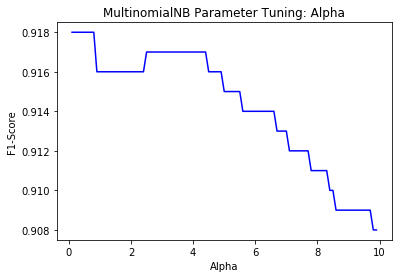

Optimal value of alpha:0.1


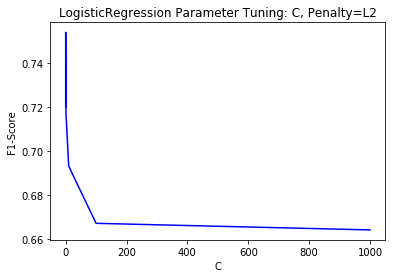

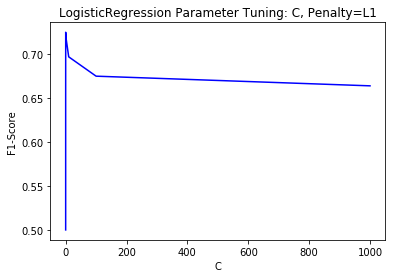

Optimal value of C and Penalty:0.1 l2


In [9]:
%matplotlib inline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

alpha_list = []
score_list = []

for i in range(1,100):
    alpha = i*0.1
    alpha_list.append(alpha)
    nb_cls = MultinomialNB(alpha = alpha)
    nb_cls.fit(dev_X, dev_y)
    f1 = nb_cls.score(dev_X, dev_y)
    score_list.append(f1)

plt.xlabel('Alpha')
plt.ylabel('F1-Score')
plt.title('MultinomialNB Parameter Tuning: Alpha')
plt.plot(alpha_list,score_list,'b-')
plt.show()

optimal_alpha = alpha_list[np.argmax(np.array(score_list))]
print('Optimal value of alpha:'+str(optimal_alpha))

C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
score_list = []
for c in C:
    nb_cls = LogisticRegression(C = c)
    nb_cls.fit(train_X, train_y)
    f1 = nb_cls.score(dev_X, dev_y)
    score_list.append(f1)

    
    
plt.xlabel('C')
plt.ylabel('F1-Score')
plt.title('LogisticRegression Parameter Tuning: C, Penalty=L2')
plt.plot(C,score_list,'b-')
plt.show()

score_list_l1 = []
for c in C:
    nb_cls = LogisticRegression(C = c,penalty = 'l1')
    nb_cls.fit(train_X, train_y)
    f1 = nb_cls.score(dev_X, dev_y)
    score_list_l1.append(f1)
plt.xlabel('C')
plt.ylabel('F1-Score')
plt.title('LogisticRegression Parameter Tuning: C, Penalty=L1')
plt.plot(C,score_list_l1,'b-')
plt.show()

optimal_c = C[np.argmax(np.array(score_list))]
optimal_penalty = 'l2'
if(np.max(np.array(score_list))<np.max(np.array(score_list_l1))):
    optimal_c = C[np.argmax(np.array(score_list_l1))]
    optimal_penalty = 'l1'
print('Optimal value of C and Penalty:'+str(optimal_c)+' '+str(optimal_penalty))

<b>Instructions</b>: Using the best settings you have found, compare the two classifiers based on performance in the test set. Print out both accuracy and macroaveraged f-score for each classifier. Be sure to label your output. (0.5)

In [10]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

nb_cls = MultinomialNB(alpha = optimal_alpha)

nb_cls.fit(train_X, train_y)
y_pred = nb_cls.predict(test_X)

target_names = ['positive','negative']
print('MultinomialNB Classification Report:\r\n')
print(classification_report(test_y,y_pred, target_names=target_names))
print('Accuracy: '+str(accuracy_score(test_y,y_pred)))

lr_cls = LogisticRegression(C = optimal_c, penalty = optimal_penalty)
lr_cls.fit(train_X, train_y)
y_pred = lr_cls.predict(test_X)
print('-------------------------------------------------------------')
print('-------------------------------------------------------------')
print('\r\n\r\nLogisticRegression Classification Report:\r\n')
print(classification_report(test_y,y_pred, target_names=target_names))
print('Accuracy: '+str(accuracy_score(test_y,y_pred)))

MultinomialNB Classification Report:

             precision    recall  f1-score   support

   positive       0.69      0.72      0.71       500
   negative       0.71      0.68      0.69       500

avg / total       0.70      0.70      0.70      1000

Accuracy: 0.701
-------------------------------------------------------------
-------------------------------------------------------------


LogisticRegression Classification Report:

             precision    recall  f1-score   support

   positive       0.75      0.69      0.72       500
   negative       0.72      0.77      0.74       500

avg / total       0.74      0.73      0.73      1000

Accuracy: 0.734
